In [1]:
%matplotlib inline

In [2]:
%load_ext autoreload
%autoreload 2

In [20]:
# import jtplot submodule from jupyterthemes
from jupyterthemes import jtplot

# currently installed theme will be used to
# set plot style if no arguments provided
# jtplot.style()
jtplot.style(context='talk', fscale=1.4, spines=False, gridlines='', theme='grade3')

In [4]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
from glob import glob

from parse_utils import load_perf_file, get_metric, compare_metrics

# import seaborn as sns
# sns.set_style('whitegrid')

In [6]:
#def load_ttree_perf_file(file, method=""):
    

In [35]:
perfs = []
perfs += [load_perf_file(f,method='samtools') for f in glob('data/m6148_out/out_sam/*.perf')]
# perfs += [load_perf_file(f,method='ramtools') for f in glob('samexample_out/out-ram/*.perf')]
# perfs += [load_perf_file(f,method='ramtools-') for f in glob('samexample_out/out-comp/*.perf')]
# perfs += [load_perf_file(f,method='ramtools-E') for f in glob('samexample_out/out-ram-E/*.perf')]
# perfs += [load_perf_file(f,method='ramtools-bin') for f in glob('samexample_out/out-ram-bin/*.perf')]
# perfs += [load_perf_file(f,method='ramtools-bin-E') for f in glob('samexample_out/out-ram-bin-E/*.perf')]

perfs += [load_perf_file(f,method='ramtools_lzma_split') for f in glob('data/m6148_out/out_ram_lzma_split/*.perf')]
perfs += [load_perf_file(f,method='ramtools_lzma_nosplit') for f in glob('data/m6148_out/out_ram_lzma_nosplit/*.perf')]
perfs += [load_perf_file(f,method='ramtools_zlib_split') for f in glob('data/m6148_out/out_ram_zlib_split/*.perf')]
perfs += [load_perf_file(f,method='ramtools_zlib_nosplit') for f in glob('data/m6148_out/out_ram_zlib_nosplit/*.perf')]

perfs += [load_perf_file(f,method='ramtools_lzma_split_index') for f in glob('data/m6148_out/out_ram_lzma_split_index/*.perf')]
perfs += [load_perf_file(f,method='ramtools_lzma_nosplit_index') for f in glob('data/m6148_out/out_ram_lzma_nosplit_index/*.perf')]
perfs += [load_perf_file(f,method='ramtools_zlib_split_index') for f in glob('data/m6148_out/out_ram_zlib_split_index/*.perf')]
perfs += [load_perf_file(f,method='ramtools_zlib_nosplit_index') for f in glob('data/m6148_out/out_ram_zlib_nosplit_index/*.perf')]

# perfs += [load_perf_file(f,method='ramtools') for f in glob('data/m6148_out/out_ram/*.perf')]
# perfs += [load_perf_file(f,method='ramtools_index') for f in glob('data/m6148_out/out_ram_index/*.perf')]

In [36]:
columns = ['genome', 'method', 'region', 'usertime', 'systemtime', 'cpu_usage', 'memory', 'filesize']

In [54]:
df = pd.DataFrame(data=perfs, columns=columns)
df['totaltime'] = df['usertime'] + df['systemtime']

df['Speed_MBps'] = (df['filesize']/1024**2)/ df['totaltime']

df['mem_MB'] = df['memory']/(1024)

In [55]:
dfi = pd.read_csv('data/m6148_views.csv', index_col=0)
regions = dfi['rname']+':'+dfi['start'].astype(str)+'-'+dfi['end'].astype('str')

In [56]:
N = 10
relative = None
# methods = ['samtools', 'ramtools', 'ramtools-E', 'ramtools-bin', 'ramtools-bin-E']
# methods = ['samtools', 'ramtools', 'ramtools-comp']
methods = ["samtools", "ramtools_lzma_split", "ramtools_lzma_nosplit", "ramtools_zlib_split", "ramtools_zlib_nosplit"]
methods_index = ["samtools", "ramtools_lzma_split_index", "ramtools_lzma_nosplit_index", "ramtools_zlib_split_index", "ramtools_zlib_nosplit_index"]
methods_zlib = ["samtools", "ramtools_zlib_split", "ramtools_zlib_split_index", "ramtools_zlib_nosplit_index"]
# methods = ['samtools', 'ramtools', 'ramtools_index']

all_methods = methods + methods_index[1:]

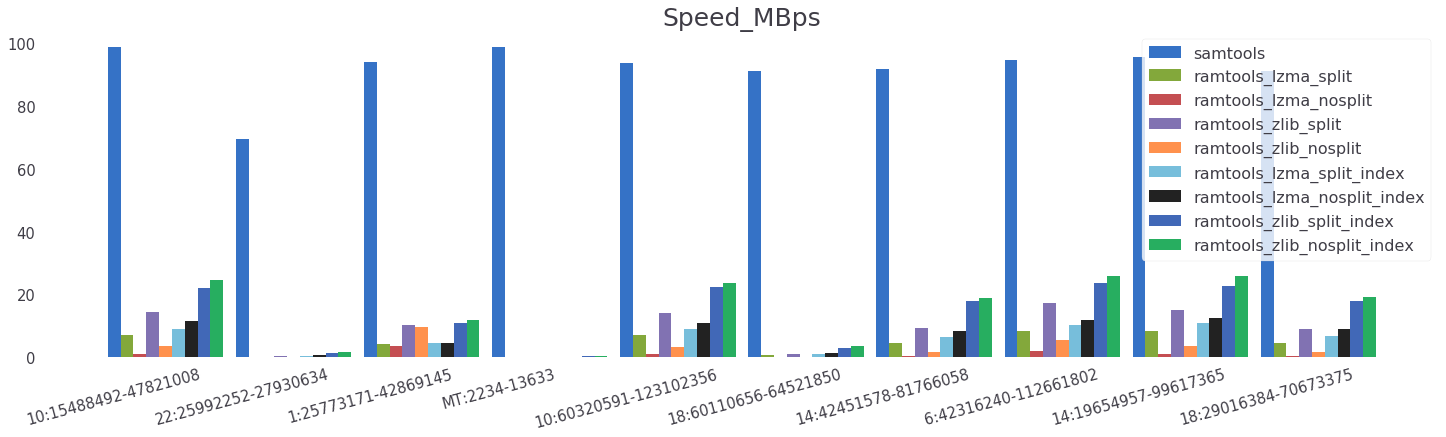

In [59]:
compare_metrics(df, all_methods , regions[:N], 'Speed_MBps', relative=relative)

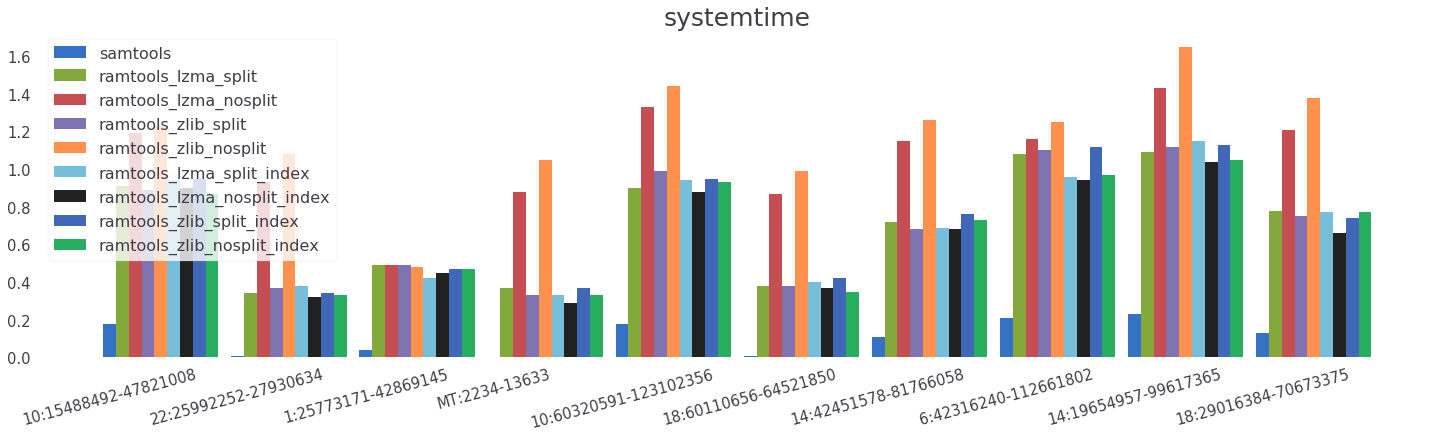

In [60]:
compare_metrics(df,  all_methods, regions[:N], 'systemtime', relative=relative)

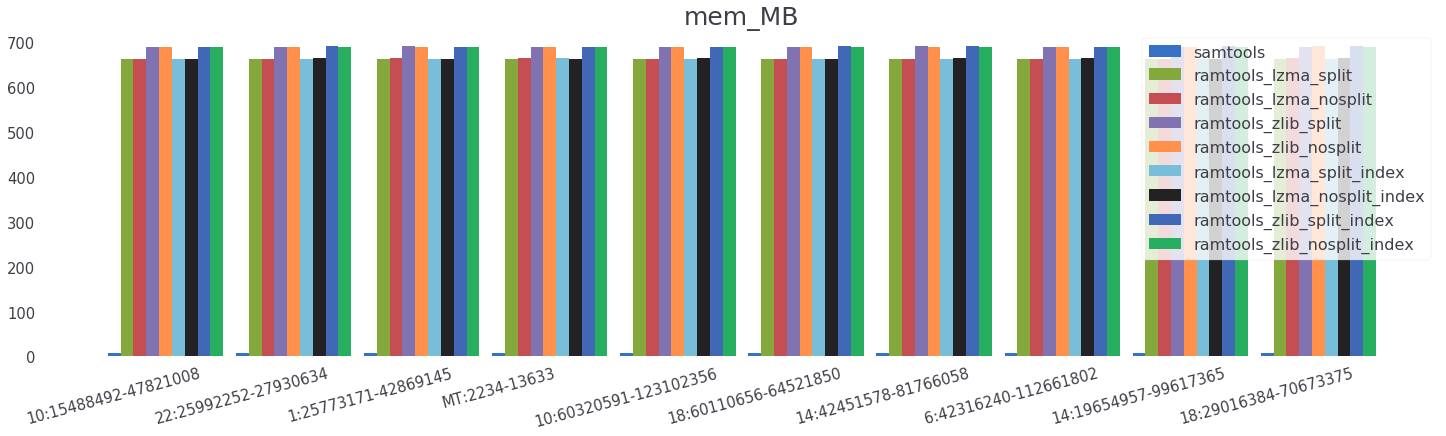

In [63]:
compare_metrics(df,  all_methods, regions[:N], 'mem_MB', relative=relative)


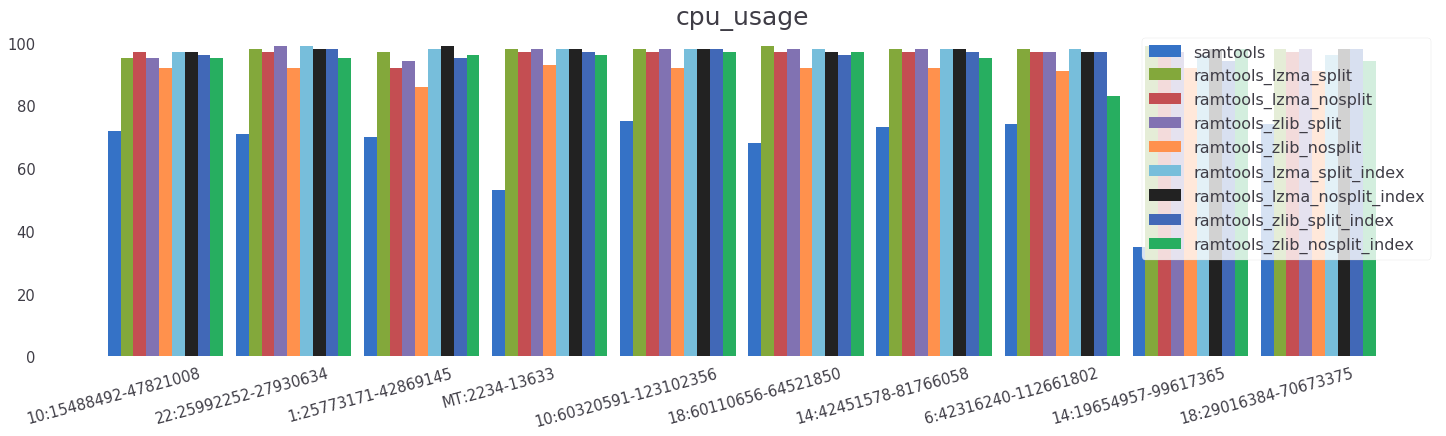

In [51]:
compare_metrics(df,  all_methods, regions[:N], 'cpu_usage', relative=relative)

In [45]:
df

,genome,method,region,usertime,systemtime,cpu_usage,memory,filesize,totaltime,Speed_Mbps
0,m6148.bam,samtools,1:25773171-42869145,0.22,0.04,70.0,7924,25571415,0.26,93.795391
1,m6148.bam,samtools,1:52509435-126380432,1.18,0.39,77.0,8160,128026802,1.57,77.768072
2,m6148.bam,samtools,10:15488492-47821008,0.74,0.18,72.0,8204,95274815,0.92,98.762113
3,m6148.bam,samtools,10:60320591-123102356,0.79,0.18,75.0,8260,95292682,0.97,93.688849
4,m6148.bam,samtools,12:29752263-117530002,1.08,0.26,73.0,8292,130388258,1.34,92.796965
5,m6148.bam,samtools,13:53205671-71854207,0.26,0.08,74.0,8132,28349491,0.34,79.518181
6,m6148.bam,samtools,14:19654957-99617365,0.99,0.23,35.0,8264,122265596,1.22,95.575048
7,m6148.bam,samtools,14:42451578-81766058,0.51,0.11,73.0,8272,59516773,0.62,91.547771
8,m6148.bam,samtools,18:29016384-70673375,0.53,0.13,74.0,8184,63023289,0.66,91.066200
9,m6148.bam,samtools,18:60110656-64521850,0.06,0.01,68.0,8184,6678495,0.07,90.987274
